In [1]:
import xarray as xr
import xroms
import pandas as pd
import numpy as np

# How to select data

The [load_data](load_data.ipynb) notebook demonstrates how to load in data, but now how to select out parts of it?

## Load in data

More information at in [load_data notebook](load_data.ipynb)

In [2]:
loc = 'http://barataria.tamu.edu:8080/thredds/dodsC/forecast_latest/txla2_his_f_latest.nc'
chunks = {'ocean_time':1}
ds = xr.open_dataset(loc, chunks=chunks)

In [3]:
ds

<xarray.Dataset>
Dimensions:         (eta_psi: 190, eta_rho: 191, eta_u: 191, eta_v: 190, ocean_time: 96, s_rho: 30, s_w: 31, tracer: 6, xi_psi: 670, xi_rho: 671, xi_u: 670, xi_v: 671)
Coordinates:
  * s_rho           (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w             (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lon_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
    lat_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
    lon_u           (eta_u, xi_u) float64 dask.array<chunksize=(191, 670), meta=np.ndarray>
    lat_u           (eta_u, xi_u) float64 dask.array<chunksize=(191, 670), meta=np.ndarray>
    lon_v           (eta_v, xi_v) float64 dask.array<chunksize=(190, 671), meta=np.ndarray>
    lat_v           (eta_v, xi_v) float64 dask.array<chunksize=(190, 671), meta=np.ndarray>
    lon_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(190, 670), meta=np.ndarray>
    lat_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(190, 670), meta=np.ndarray>
  * ocean_time      (ocean_time) datetime64[ns] 2020-07-23T01:00:00 ... 2020-...
Dimensions without coordinates: eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    shuffle         int32 ...
    deflate         int32 ...
    deflate_level   int32 ...
    nHIS            int32 ...
    ndefHIS         int32 ...
    nRST            int32 ...
    nSTA            int32 ...
    Falpha          float64 ...
    Fbeta           float64 ...
    Fgamma          float64 ...
    nl_tnu2         (tracer) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    nl_visc2        float64 ...
    LuvSponge       int32 ...
    LtracerSponge   (tracer) int32 dask.array<chunksize=(6,), meta=np.ndarray>
    Akt_bak         (tracer) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    Akv_bak         float64 ...
    Akk_bak         float64 ...
    Akp_bak         float64 ...
    rdrg            float64 ...
    rdrg2           float64 ...
    Zob             float64 ...
    Zos             float64 ...
    gls_p           float64 ...
    gls_m           float64 ...
    gls_n           float64 ...
    gls_cmu0        float64 ...
    gls_c1          float64 ...
    gls_c2          float64 ...
    gls_c3m         float64 ...
    gls_c3p         float64 ...
    gls_sigk        float64 ...
    gls_sigp        float64 ...
    gls_Kmin        float64 ...
    gls_Pmin        float64 ...
    Charnok_alpha   float64 ...
    Zos_hsig_alpha  float64 ...
    sz_alpha        float64 ...
    CrgBan_cw       float64 ...
    Znudg           float64 ...
    M2nudg          float64 ...
    M3nudg          float64 ...
    Tnudg           (tracer) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    Tnudg_SSS       float64 ...
    rho0            float64 ...
    gamma2          float64 ...
    LuvSrc          int32 ...
    LwSrc           int32 ...
    LtracerSrc      (tracer) int32 dask.array<chunksize=(6,), meta=np.ndarray>
    LsshCLM         int32 ...
    Lm2CLM          int32 ...
    Lm3CLM          int32 ...
    LtracerCLM      (tracer) int32 dask.array<chunksize=(6,), meta=np.ndarray>
    LnudgeM2CLM     int32 ...
    LnudgeM3CLM     int32 ...
    LnudgeTCLM      (tracer) int32 dask.array<chunksize=(6,), meta=np.ndarray>
    spherical       int32 ...
    xl              float64 ...
    el              float64 ...
    Vtransform      int32 ...
    Vstretching     int32 ...
    theta_s         float64 ...
    theta_b         float64 ...
    Tcline          float64 ...
    hc              float64 ...
    grid            int32 ...
    Cs_r            (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    Cs_w            (s_w) float64 dask.array<chunksize=(31,), meta=np.ndarr

## Select

### Surface

The surface in ROMS is given by the last index in the vertical dimension. The easiest way to access this is by indexing into `s_rho`. While normally it is better to access coordinates through keywords to be human-readable, it's not easy to tell what value of `s_rho` gives the surface. In this instance, it's easier to just go by index.

In [15]:
ds.salt.isel(s_rho=-1)

<xarray.DataArray 'salt' (ocean_time: 96, eta_rho: 191, xi_rho: 671)>
dask.array<getitem, shape=(96, 191, 671), dtype=float32, chunksize=(1, 191, 671), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.01667
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2020-07-23T01:00:00 ... 2020-07-27
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:    salinity
    time:         ocean_time
    grid:         grid
    location:     face
    field:        salinity, scalar, series
    _ChunkSizes:  [  1  15  96 336]

### Single time

Find the forecast model output available that is closest to now. Note that the `method` keyword argument is not necessary if the desired date/time is exactly a model output time.

In [18]:
now = pd.Timestamp.today()

In [20]:
ds.salt.isel(s_rho=-1).sel(ocean_time=now, method='nearest')

<xarray.DataArray 'salt' (eta_rho: 191, xi_rho: 671)>
dask.array<getitem, shape=(191, 671), dtype=float32, chunksize=(191, 671), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.01667
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
    ocean_time  datetime64[ns] 2020-07-23T16:00:00
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:    salinity
    time:         ocean_time
    grid:         grid
    location:     face
    field:        salinity, scalar, series
    _ChunkSizes:  [  1  15  96 336]

### Range of time

In [21]:
ds.salt.sel(ocean_time=slice(now,now+pd.Timedelta('2 days')))

<xarray.DataArray 'salt' (ocean_time: 48, s_rho: 30, eta_rho: 191, xi_rho: 671)>
dask.array<getitem, shape=(48, 30, 191, 671), dtype=float32, chunksize=(1, 30, 191, 671), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2020-07-23T16:00:00 ... 2020-07-2...
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:    salinity
    time:         ocean_time
    grid:         grid
    location:     face
    field:        salinity, scalar, series
    _ChunkSizes:  [  1  15  96 336]

### Region

Single location, nearest in one dimension
Area
Single location, nearest in two dimensions

#### Slice chosen by one dimension, by index

For a curvilinear ROMS grid, selecting by the dimensions `xi_rho` or `eta_rho` (or for whichever is the relevant grid) is not very meaningful because they are given by index. Thus the following is possible to get a slice along the index, but it cannot be used to find a slice based on the lon/lat values.

In [24]:
ds.temp.sel(xi_rho=20)

<xarray.DataArray 'temp' (ocean_time: 96, s_rho: 30, eta_rho: 191)>
dask.array<getitem, shape=(96, 30, 191), dtype=float32, chunksize=(1, 30, 191), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    lon_rho     (eta_rho) float64 dask.array<chunksize=(191,), meta=np.ndarray>
    lat_rho     (eta_rho) float64 dask.array<chunksize=(191,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2020-07-23T01:00:00 ... 2020-07-27
Dimensions without coordinates: eta_rho
Attributes:
    long_name:    potential temperature
    units:        Celsius
    time:         ocean_time
    grid:         grid
    location:     face
    field:        temperature, scalar, series
    _ChunkSizes:  [  1  15  96 336]

#### Slice along a longitude value

In [ ]:
PUT THIS IN ANOTHER NOTEBOOK AND REFERENCE IN

TO DO, USE ISOSLICE FOR CURVILINEAR GRID

IF NOT CURVILINEAR, CAN USE XARRAY INTERPOLATION

#### Find area

Select a boxed region by min/max lon and lat values.

Can plot directly from `xarray`, but have less control than using cartopy and projections more directly. Best for quick plots.

In [72]:
lon = np.array([-97, -96])
lat = np.array([28, 29])

In [73]:
box = ((lon[0] < ds.lon_rho) & (ds.lon_rho < lon[1]) & (lat[0] < ds.lat_rho) & (ds.lat_rho < lat[1])).compute()

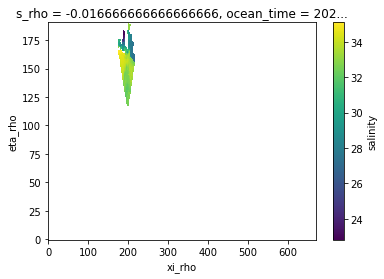

In [74]:
ds.where(box).salt.isel(s_rho=-1, ocean_time=0).plot()

In [75]:
ds.where(box).salt.isel(s_rho=-1, ocean_time=0).mean()

<xarray.DataArray 'salt' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.01667
    ocean_time  datetime64[ns] 2020-07-23T01:00:00

### Find nearest location in two dimensions

This matters for a curvilinear grid.

Can't use `sel` because it will only search in one coordinate for the nearest value and the coordinates are indices which are not necessarily geographic distance. Instead need to use a search for distance and use that for the `where` condition from the previous example.

In [3]:
lon0, lat0 = -97, 28
dssub = xroms.utilities.sel2d(ds, lon0, lat0)

In [7]:
dssub.salt

<xarray.DataArray 'salt' (ocean_time: 96, s_rho: 30, eta_rho: 1, xi_rho: 1)>
dask.array<getitem, shape=(96, 30, 1, 1), dtype=float32, chunksize=(1, 30, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2020-07-23T01:00:00 ... 2020-07-27
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:    salinity
    time:         ocean_time
    grid:         grid
    location:     face
    field:        salinity, scalar, series
    _ChunkSizes:  [  1  15  96 336]

## View data

discuss lazy operations and how to view
compute vs. persist